In [2]:
import matplotlib.pyplot as plt
import numpy as np

### Gráfico dos dados

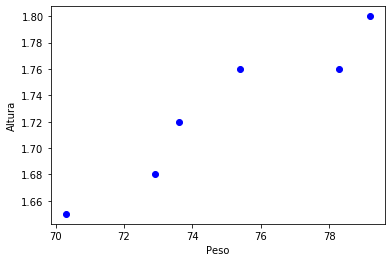

In [3]:
altura = np.array([1.76, 1.80, 1.65, 1.72, 1.76, 1.68])
peso = np.array([75.4, 79.2, 70.3, 73.6, 78.3, 72.9])
plt.plot(peso, altura, 'bo')
plt.xlabel("Peso")
plt.ylabel("Altura")
plt.show()

### Gráfico dos dados e linha aleatória

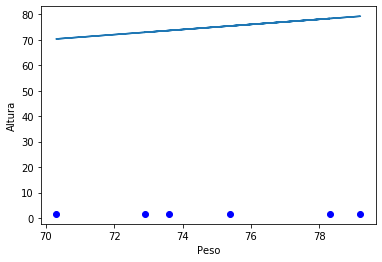

Mínimos quadrados: 32223.826499999996


In [4]:
b = 0
m = 1

plt.plot(peso, altura, 'bo')
plt.plot(peso, m * peso + b)
plt.xlabel("Peso")
plt.ylabel("Altura")
plt.show()

mq = 0
for p,a in zip(peso, altura):
    mq += (m*p+b - a)**2
print("Mínimos quadrados: {}".format(mq))

### Gráfico dos dados e linha que fiz na base da tentativa e erro

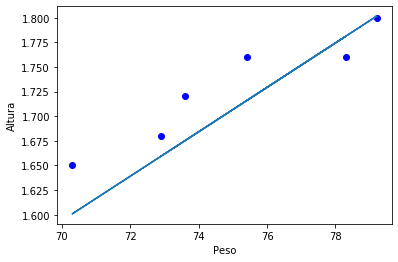

Mínimos quadrados: 0.007263865374999975


In [5]:
b = 0.0155
m = 0.02255

plt.plot(peso, altura, 'bo')
plt.plot(peso, m * peso + b)
plt.xlabel("Peso")
plt.ylabel("Altura")
plt.show()

mq = 0
for p,a in zip(peso, altura):
    mq += (m*p+b - a)**2
print("Mínimos quadrados: {}".format(mq))

# Encontrando o valor de b usando Gradient Descent

### 1° Pegar valores aleatórios para os coeficientes linear e angular

In [6]:
b = -1
m = 1

### 2° Calcular os mínimos quadrados

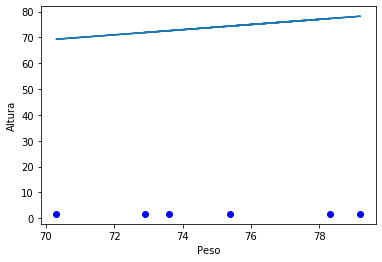

O valor dos mínimos quadrados é: 31351.1665


In [7]:
plt.plot(peso, altura, 'bo')
plt.plot(peso, m * peso + b)
#plt.axis([69, 81, 1.50, 1.85])
plt.xlabel("Peso")
plt.ylabel("Altura")
plt.show()

"""O método dos mínimos quadrados consiste em
            somar todas as diferenças ao quadrado
                entre valor esperado e valor real"""

# Método para o cálculo de mínimos quadrados
def getMQ(b, m):
    mq = 0
    for p,a in zip(peso, altura):
        mq += ( a - (m*p+b))**2
    return mq

mq = getMQ(b, m)
print("O valor dos mínimos quadrados é: {}".format(np.round(mq, 4)))

### 3° Plotar gráfico dos mínimos quadrados

#### Variando b

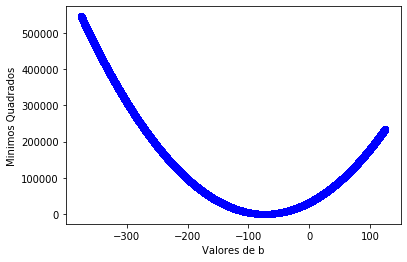

In [8]:
valores_b = []
valores_mq = []

# Valores de m vão de -375 a 125 em incrementos de 0.01
for i in range(int(500/0.01)):
    valores_b.append(-375+i*0.01)

for b_ in valores_b:
    valores_mq.append(getMQ(b_, m))
    
plt.plot(valores_b, valores_mq, 'bo')
plt.xlabel("Valores de b")
plt.ylabel("Minimos Quadrados")
plt.show()



#### Variando m

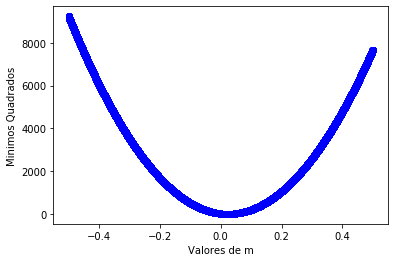

In [9]:
valores_m = []
valores_mq = []

b = 0
m = -0.5

# Valores de m vão de -375 a 125 em incrementos de 0.01
for i in range(int(1/0.00001)):
    valores_m.append(-0.5+i*0.00001)

for m_ in valores_m:
    valores_mq.append(getMQ(b, m_))
    
plt.plot(valores_m, valores_mq, 'bo')
plt.xlabel("Valores de m")
plt.ylabel("Minimos Quadrados")
plt.show()

### 4° Calculando a derivada dos mínimos quadrados

In [10]:
# Esse método calcula a derivada da função mínimos quadrados em relação à b
def getDerivadaDeMQEmRelacaoAb(b, m):
    mq = 0
    for p,a in zip(peso, altura):
        mq += -2 * ( a - (m*p+b))
    return mq

derivada_mq_em_relacao_a_b = getDerivadaDeMQEmRelacaoAb(b, m)
print("A derivada dos MQ em relação à b para b = {} e m = {} é {}".format(b, m, derivada_mq_em_relacao_a_b))

A derivada dos MQ em relação à b para b = 0 e m = -0.5 é -470.44


### 5° Calculando o novo valor de b

Para calcular o novo valor de b vamos precisar definir o learning rate e o step size.
O learnin rate é um valor que multiplica a derivada da função múltiplos quadrados. Se o lr for muito pequeno ou muito grande não vamos ser capazes de achar o tamanho adequado de step size.
O step size é o quanto o valor de b - ou m, mas nesse caso b - vai variar.

In [11]:
def setnewb(d_mq, lr):
    # Learning Rate
    if lr == 0:
        lr = 0.01

    # Step Size
    ss = d_mq * lr

    # O novo valor de b é o antigo valor de b menos o step size
    return b - ss

b = setnewb(derivada_mq_em_relacao_a_b, 0.1)

### 6° Repetindo 4° e 5° até que a derivada de MQ seja quase zero

In [12]:
b = 0

for i in range(1000):
    derivada_mq_em_relacao_a_b = getDerivadaDeMQEmRelacaoAb(b, m)
    b = setnewb(derivada_mq_em_relacao_a_b, 0.1)
    
print("O valor final de b é {}".format(np.round(b, 4)))

O valor final de b é 39.2033


# Usando Gradient Descent para calcular b e m

### 1° Pegando valores aleatórios para b e m

In [13]:
b = 0
m = 1

### 2° Calcular o gradiente de MQ

Vamos calcular o gradiente de MQ e usar suas componentes separadamente para calcular o step size de cada iteração.

In [14]:
# Já temos o método da derivada em relação à b, só precisamos então do método da derivada em relação à m
def getDerivadaDeMQEmRelacaoAm(b, m):
    mq = 0
    for p,a in zip(peso, altura):
        mq += -2 * p * ( a - (m*p+b))
    return mq

derivada_mq_em_relacao_a_b = getDerivadaDeMQEmRelacaoAb(b, m)
derivada_mq_em_relacao_a_m = getDerivadaDeMQEmRelacaoAm(b, m)

print("A derivada de MQ em relação a b para b = {} e m = {} é {}".format(b, m, derivada_mq_em_relacao_a_b))
print("A derivada de MQ em relação a m para b = {} e m = {} é {}".format(b, m, derivada_mq_em_relacao_a_m))

A derivada de MQ em relação a b para b = 0 e m = 1 é 878.6600000000001
A derivada de MQ em relação a m para b = 0 e m = 1 é 65968.038


### 3° Calculando os novos valores de b e m

In [15]:
# Já criamos a função para calcular o novo valor de b, nos resta agora criar a função para o novo valor de m
def setnewm(d_mq_m, lr):
    # d_mq_m é a derivada de MQ em relação à m
    
    # Learning Rate
    if lr == 0:
        lr = 0.01

    # Step Size
    ss = d_mq_m * lr

    # O novo valor de b é o antigo valor de b menos o step size
    return m - ss

b = setnewb(derivada_mq_em_relacao_a_b, 0.00001)
m = setnewm(derivada_mq_em_relacao_a_m, 0.00001)

print("Os novos valores de b e m são respectivamente: {} e {}".format(b, m))

Os novos valores de b e m são respectivamente: -0.008786600000000002 e 0.34031961999999993


### 4° Repetir 2° e 3° até obter derivadas proximas de zero

In [16]:
b = 0
m = 1

for i in range(1000):
    derivada_mq_em_relacao_a_b = getDerivadaDeMQEmRelacaoAb(b, m)
    derivada_mq_em_relacao_a_m = getDerivadaDeMQEmRelacaoAm(b, m)
    b = setnewb(derivada_mq_em_relacao_a_b, 0.00001)
    m = setnewm(derivada_mq_em_relacao_a_m, 0.00001)
    
print("Os valores finais são: b = {} e m = {}".format(b, m))

Os valores finais são: b = -0.012896392683915469 e m = 0.023219213932861218


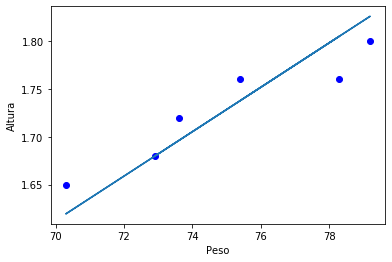

O valor dos mínimos quadrados é: 0.0047


In [17]:
plt.plot(peso, altura, 'bo')
plt.plot(peso, m * peso + b)
plt.xlabel("Peso")
plt.ylabel("Altura")
plt.show()

mq = getMQ(b, m)
print("O valor dos mínimos quadrados é: {}".format(np.round(mq, 4)))